In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns

# PART 1

## Question 1

In [2]:
test_file = 'data/test.csv'
train_file = 'data/train.csv'
test_data = pd.read_csv(test_file)
train_data = pd.read_csv(train_file)

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Question 2

### Continuous features

1. Lot area
2. Lot Frontage
3. GrLivArea

### Categorical features

1. MSZoning
2. Street
3. Lot Shape

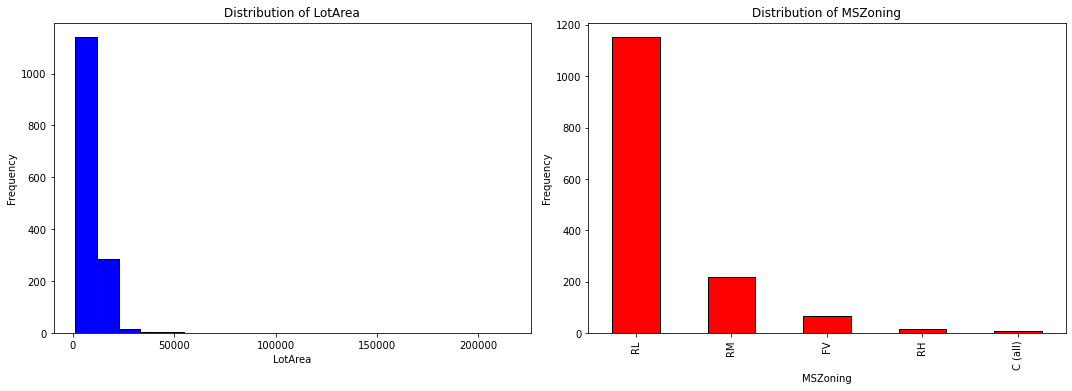

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(train_data['LotArea'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
train_data['MSZoning'].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Question 3 . Preprocessing

In [5]:
# drop the id, miscfeature, miscval as it is not needed for training
train_data = train_data.drop('Id', axis=1)
train_data = train_data.drop('MiscFeature', axis=1)
train_data = train_data.drop('MiscVal', axis=1)
# too many missing values
train_data = train_data.drop(['PoolQC', 'PoolArea', 'MasVnrType', 'MasVnrArea'], axis=1)

test_data = test_data.drop('Id', axis=1)
test_data = test_data.drop('MiscFeature', axis=1)
test_data = test_data.drop('MiscVal', axis=1)
# too many missing values
test_data = test_data.drop(['PoolQC', 'PoolArea', 'MasVnrType', 'MasVnrArea'], axis=1)

In [6]:
# extract info about the features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# Dealing with missing values:
# 1. Replace the numerical features with the median to not skew the data
# 2. Replace the missing categorical features with mode

In [8]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

test_data['LotFrontage'] = test_data['LotFrontage'].fillna(test_data['LotFrontage'].median())
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].median())

In [9]:
train_data['BsmtQual'] = train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType'] = train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageFinish'] = train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual'] = train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond'] = train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])


test_data['BsmtQual'] = test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtCond'] = test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType'] = test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish'] = test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual'] = test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond'] = test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])

In [10]:
# create a new value for alley and fence.
# there is a lot of missing data and presence of alley and a fence can affect the price of the house.
# will replace NA with NoAlley and NoFence
train_data['Alley'] = train_data['Alley'].fillna('NoAlley')
train_data['Fence'] = train_data['Fence'].fillna('NoFence')

test_data['Alley'] = test_data['Alley'].fillna('NoAlley')
test_data['Fence'] = test_data['Fence'].fillna('NoFence')

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
# Select the features that should be scaled
columns_to_scale = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtFinSF1']

# Apply scaling only to the columns that need scaling
scaler = MinMaxScaler(feature_range=(0, 1))

train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])
test_data[columns_to_scale] = scaler.transform(test_data[columns_to_scale])

# Ensure all columns are numeric (convert boolean columns to integers if any)
train_data = train_data.astype({col: 'int64' for col in train_data.select_dtypes(include=['bool']).columns})
test_data = test_data.astype({col: 'int64' for col in test_data.select_dtypes(include=['bool']).columns})

## Question 4. One-Hot-Encoding

In [13]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data_ohe = pd.get_dummies(train_data, columns=categorical_columns)
test_data_ohe = pd.get_dummies(train_data, columns=categorical_columns)

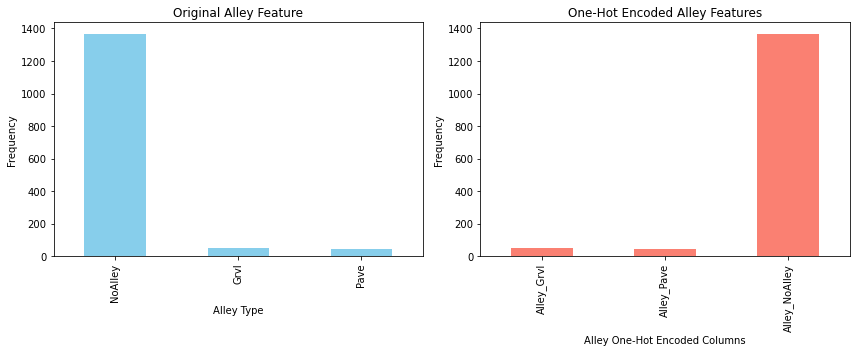

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_data['Alley'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Original Alley Feature')
plt.xlabel('Alley Type')
plt.ylabel('Frequency')

# Step 2: Plot the histogram of the one-hot encoded 'Alley' feature
plt.subplot(1, 2, 2)
train_data_ohe[['Alley_Grvl', 'Alley_Pave', 'Alley_NoAlley']].sum().plot(kind='bar', color='salmon')
plt.title('One-Hot Encoded Alley Features')
plt.xlabel('Alley One-Hot Encoded Columns')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Question 5. OLS on the training set

In [15]:
# Exclude the 'SalePrice' column and select all other columns as features
X = train_data_ohe.drop(columns=['SalePrice'])

y = train_data_ohe['SalePrice']

X = (X - X.mean()) / X.std()

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X = np.c_[np.ones(X.shape[0]), X.values]

theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

y_pred = X @ theta

mse = np.mean((y - y_pred) ** 2)

ss_total = np.sum((y - y.mean()) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

# Print the results
print(f'MSE: {mse}')
print(f'R² Score: {r2_score}')

MSE: 1089641337308157.0
R² Score: -172771.77057287114


Mean Squared Error (MSE): 1420973671.3076346
R² Score: 0.7746914056056099


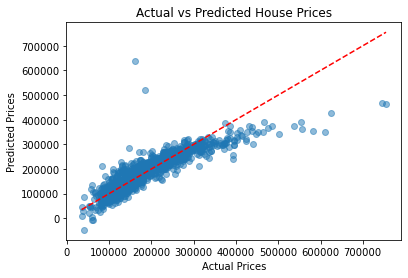

In [16]:
# Select certain features
X = train_data_ohe[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'LotArea', '1stFlrSF']]

y = train_data_ohe['SalePrice']

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X = np.c_[np.ones(X.shape[0]), X.values]

theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

y_pred = X @ theta

mse = np.mean((y - y_pred) ** 2)

ss_total = np.sum((y - y.mean()) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2_score}')

plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Mean Squared Error (MSE): 1263321863.46172
R² Score: 0.7996885663178209


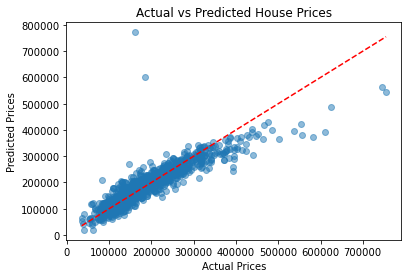

In [17]:
# Expand feature selection (adding more relevant features)
X = train_data_ohe[['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 
                    'LotArea', '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'TotRmsAbvGrd', 
                    'Fireplaces']].copy()


# Add interaction terms (e.g., OverallQual * GrLivArea)
X.loc[:, 'OverallQual_GrLivArea'] = X['OverallQual'] * X['GrLivArea']

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X = np.c_[np.ones(X.shape[0]), X.values]

y = train_data_ohe['SalePrice']

X = (X - X.mean()) / X.std()

theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

y_pred = X @ theta

mse = np.mean((y - y_pred) ** 2)

ss_total = np.sum((y - y.mean()) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2_score}')

plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Mean Squared Error (MSE): 590961027.9264972
R² Score: 0.8803848430918902


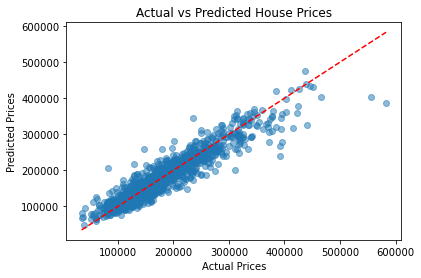

In [18]:
# Expand feature selection (removing less important features)
X = train_data_ohe[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 
                    'LotArea', '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'TotRmsAbvGrd', 
                    'Fireplaces']].copy()

X.loc[:, 'OverallQual_GrLivArea'] = X['OverallQual'] * X['GrLivArea']
X.loc[:, 'TotalBsmtSF_1stFlrSF'] = X['TotalBsmtSF'] * X['1stFlrSF']

X = X[(X['GrLivArea'] < X['GrLivArea'].quantile(0.99)) & 
      (X['LotArea'] < X['LotArea'].quantile(0.99)) & 
      (X['TotalBsmtSF'] < X['TotalBsmtSF'].quantile(0.99))]

y = np.log(train_data_ohe['SalePrice'][X.index])

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

X = np.c_[np.ones(X.shape[0]), X.values]

# Normalize the feature matrix
X = (X - X.mean()) / X.std()

# Apply OLS (Normal Equation)
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Make predictions (inverse log for interpretation)
y_pred = np.exp(X @ theta)  # Inverse of log to get back to original scale

# SCalculate MSE and R²
mse = np.mean((np.exp(y) - y_pred) ** 2)  # Compare actual and predicted values on original scale
ss_total = np.sum((np.exp(y) - np.exp(y).mean()) ** 2)
ss_residual = np.sum((np.exp(y) - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2_score}')

# Plot actual vs predicted values
plt.scatter(np.exp(y), y_pred, alpha=0.5)
plt.plot([min(np.exp(y)), max(np.exp(y))], [min(np.exp(y)), max(np.exp(y))], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

### Question 6

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Select features for the training data
X_train = train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 
                      'LotArea', '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'TotRmsAbvGrd', 
                      'Fireplaces']].copy()

# Add interaction terms
X_train['OverallQual_GrLivArea'] = X_train['OverallQual'] * X_train['GrLivArea']
X_train['TotalBsmtSF_1stFlrSF'] = X_train['TotalBsmtSF'] * X_train['1stFlrSF']

# Remove outliers from the training data
X_train = X_train[(X_train['GrLivArea'] < X_train['GrLivArea'].quantile(0.99)) & 
                  (X_train['LotArea'] < X_train['LotArea'].quantile(0.99)) & 
                  (X_train['TotalBsmtSF'] < X_train['TotalBsmtSF'].quantile(0.99))]

# Log-transform the target variable (SalePrice)
y_train = np.log(train_data['SalePrice'][X_train.index])

# Preprocess the test data using the same features
X_test = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 
                    'LotArea', '1stFlrSF', 'BsmtFinSF1', 'FullBath', 'TotRmsAbvGrd', 
                    'Fireplaces']].copy()

# Apply the same interaction terms to the test data
X_test['OverallQual_GrLivArea'] = X_test['OverallQual'] * X_test['GrLivArea']
X_test['TotalBsmtSF_1stFlrSF'] = X_test['TotalBsmtSF'] * X_test['1stFlrSF']

# Handle missing values (if any)
X_test = X_test.fillna(0)

# Step 3: Scale both the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Apply scaling to test data

# Step 4: Train the model using scikit-learn's LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test data
y_test_pred_log = model.predict(X_test_scaled)
y_test_pred = np.exp(y_test_pred_log)  # Inverse log transformation to get back to the original SalePrice

test_data = pd.read_csv('data/test.csv')

# Ensure the submission has the same 'Id' as in the test data
submission = pd.DataFrame({
    'Id': test_data['Id'],        # Use the Id from the test.csv
    'SalePrice': y_test_pred      # Your predicted SalePrice values
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# PART 2

In [20]:
test_file = 'titanic/test.csv'
train_file = 'titanic/train.csv'
test_df = pd.read_csv(test_file)
train_df = pd.read_csv(train_file)

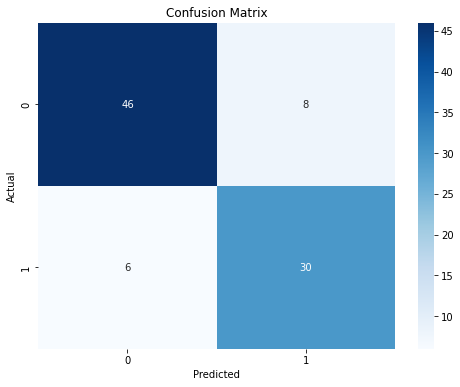

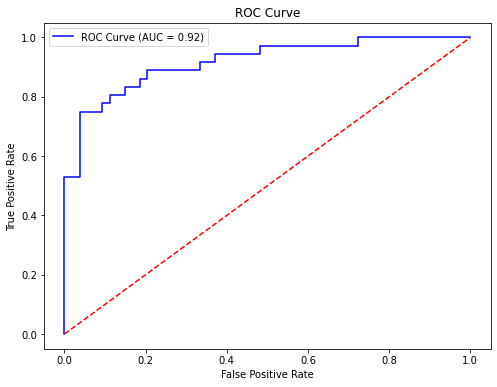

Accuracy: 0.8444444444444444
ROC AUC: 0.9182098765432098


In [21]:
# Data Preprocessing

# Fill missing 'Age' with median
train_df = train_df.assign(Age=train_df['Age'].fillna(train_df['Age'].median()))
test_df = test_df.assign(Age=test_df['Age'].fillna(test_df['Age'].median()))

# Fill missing 'Fare' with median in test data
test_df = test_df.assign(Fare=test_df['Fare'].fillna(test_df['Fare'].median()))

# Fill missing 'Embarked' with the most common value
train_df = train_df.assign(Embarked=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0]))
test_df = test_df.assign(Embarked=test_df['Embarked'].fillna(test_df['Embarked'].mode()[0]))

# Drop 'Cabin' as it's mostly missing, and 'Ticket' and 'Name' since they may not provide meaningful information
train_df = train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1)

# Convert 'Sex' and 'Embarked' into numerical values using LabelEncoder
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
test_df['Embarked'] = le.transform(test_df['Embarked'])


# Step 2: Splitting Features and Target Variable
X = train_df.drop('Survived', axis=1)  # Features
y = train_df['Survived']  # Target variable

# Split the training data into training and validation sets (90% train, 10% validate)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_df = scaler.transform(test_df)

# Step 3: Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_val)
y_pred_prob = logreg.predict_proba(X_val)[:, 1]

# Step 4: Performance Metrics
# Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_val, y_pred_prob)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

# Make predictions on the test set
test_predictions = logreg.predict(test_df)

# Save the predictions to a CSV file for submission to Kaggle
submission = pd.DataFrame({
    "PassengerId": pd.read_csv('titanic/test.csv')["PassengerId"],
    "Survived": test_predictions
})
submission.to_csv('titanic/submission.csv', index=False)
